**Naive Bayes - Toxic Comment Classification**
===========

**Extracts kagle database by author DATAISTA0 (JULIÁN PELLER) . licensed by CC0: Public Domain**

https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge

By Lucas Victor Silva.

In [45]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv(r'C:\Users\lucas\Downloads\2023.2\Intro Data Science\EE1\EE1 - Naive Bayes\train.csv')
df.head(100)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
95,003b9f448ee4a29d,"""\n\nThanks. I can see that violating clearly ...",0,0,0,0,0,0
96,003bd094feef5263,"""\nHi\nThanks for our kind words. See you arou...",0,0,0,0,0,0
97,003caacc6ce6c9e9,Collusion in poker \n\nThis is regarded as mos...,0,0,0,0,0,0
98,003d77a20601cec1,"Thanks much - however, if it's been resolved, ...",0,0,0,0,0,0


**Treinamento**
===========

**Transformando os dados de test em colunas binárias, onde Tóxico = 1 e Não Tóxico = 0**
===========

In [47]:
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0 ).astype(int)
df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(100)

,text,y
146801,"""\n\nBehinderte Russen: Meaning """"Retarded Rus...",1
54837,Bits of stuff removed here,0
126295,"""\n\n I'm glad you enjoy my comments. \n\nI'm ...",0
51618,"I realise that, but maybe it would be worth re...",0
146183,April .... are you gay?\n\nIf you block or del...,1
...,...,...
117659,"Look at the history -) 12:10, 16 Dec 2004 (UTC)",0
138971,"Ahhh, the meatpuppetry acting. This should be ...",0
49434,"""\n\n Please do not remove content from pages ...",0
156996,"""\nNot quite, TFD. My dispute with them is tha...",0


**Verificando a Subamostra do Dataset de treinamento**
===========

**Identificando a classe majoritária do treinamento:**

In [48]:
df['y'].value_counts(normalize=True)


0    0.898321
1    0.101679
Name: y, dtype: float64

**Usando o sample para igualar as classes do treinamento:**
===========

In [55]:
#Como o conjunto de dados é muito desbalanceado. Igualei classe majoritária da amostra

min_len = (df['y'] == 1).sum()
df_y0_undersample = df[df['y'] == 0].sample(n=min_len, random_state=201)
df = pd.concat([df[df['y'] == 1], df_y0_undersample])
df['y'].value_counts()


1    16225
0    16225
Name: y, dtype: int64

**Vetorizando os dados de treinamento com oa TfidVectorizer**
===========

In [50]:
#Definindo os peses para classificação com o TF-IDF

vec = TfidfVectorizer()
X = vec.fit_transform(df['text'])
X

<32450x65740 sparse matrix of type '<class 'numpy.float64'>'
	with 1221879 stored elements in Compressed Sparse Row format>

**Matriz de correlação dos dados de treinamento:**
===========

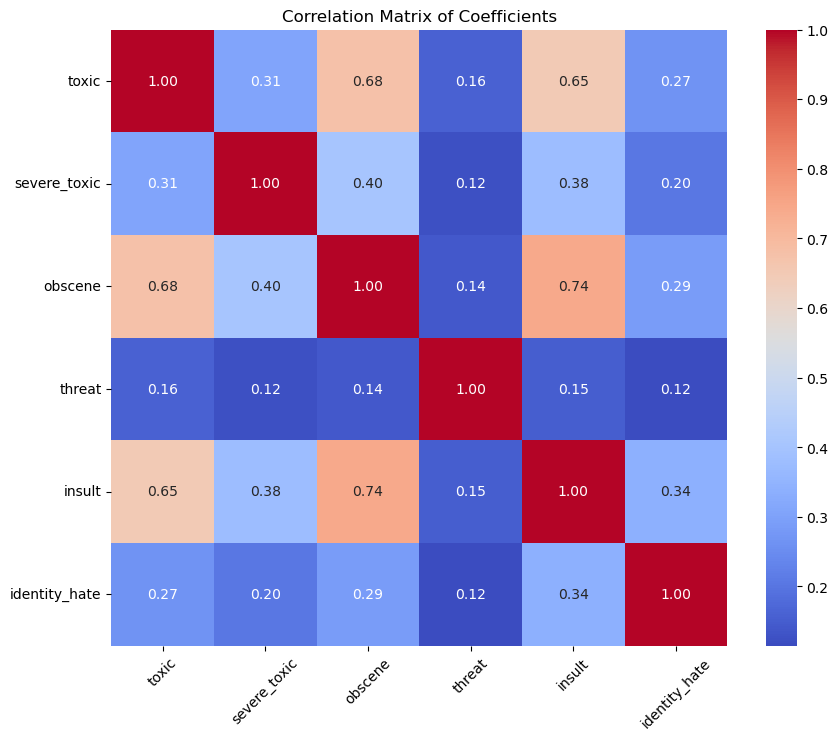

In [19]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title('Correlation Matrix of Coefficients')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**Aplicando o Naive Bayes**
===========

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

model = MultinomialNB()
model.fit(X, df['y'])

MultinomialNB()

**Validação do Treinanmento**
===========

**Calculando Matriz de Confusão**
===========

In [66]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['y'], test_size=0.2, random_state=42)

# Criação da instância do TfidfVectorizer
vectorizer = TfidfVectorizer()

# Ajustando o vetorizador aos dados de treinamento e transformá-los em vetores TF-IDF
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Criar e treinar o modelo MultinomialNB
model = MultinomialNB()
model.fit(X_train_transformed, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_transformed)

# Calcular a matriz de confusão
matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão:")
print(matrix)


Matriz de Confusão:
[[2915  314]
 [ 482 2779]]


                                                 Classe Prevista Negativa  |  Classe Prevista Positiva
                                                 -----------------------------------------------------------------------------------
                                                 Classe Real Negativa      |  2915 (Verdadeiro Negativo)   314 (Falso Positivo)
                                                 Classe Real Positiva      |  482 (Falso Negativo)        2779 (Verdadeiro Positivo)


**Precisão, recall, F1, support e Acuracia do Modelo**
===========

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3229
           1       0.90      0.85      0.87      3261

    accuracy                           0.88      6490
   macro avg       0.88      0.88      0.88      6490
weighted avg       0.88      0.88      0.88      6490



**Submissão dos Dados**
===========

In [11]:
df_sub = pd.read_csv(r'C:\Users\lucas\Downloads\2023.2\Intro Data Science\EE1\EE1 - Naive Bayes\submission.csv')
X_test = vec.transform(df_sub['comment_text'])
p3 = model.predict_proba(X_test)
df_sub.head(100)

,comment_text,id
0,Yo bitch Ja Rule is more succesful then you'll...,00001cee341fdb12
1,== From RfC == \n\n The title is fine as it is...,0000247867823ef7
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",00013b17ad220c46
3,":If you have a look back at the source, the in...",00017563c3f7919a
4,I don't anonymously edit articles at all.,00017695ad8997eb
...,...,...
95,""" \n\n == Main towns that are not so main == \...",0023f3f84f353bce
96,""" \n\n my comments follow, bluewillow991967 -...",002586bdf3280356
97,""" \n\n == Halliday == \n\n Good to see another...",0025a91b6955f1a5
98,""" \n ::: That Stephen Barrett is not Board Cer...",0025c49d87d9a18f


**Classes após classificação**
===========

In [12]:
df_sub['score'] = p3[:, 1]
df_sub['score'].count()

153164

In [13]:
df_sub['score'].nunique()

149045

**Dados Submetidos e Classificados**
===========

In [14]:
df_sub[['comment_text', 'score']].to_csv("sample_submission.csv", index=False)
df_sub.head(100)

,comment_text,id,score
0,Yo bitch Ja Rule is more succesful then you'll...,00001cee341fdb12,0.996291
1,== From RfC == \n\n The title is fine as it is...,0000247867823ef7,0.110922
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",00013b17ad220c46,0.333373
3,":If you have a look back at the source, the in...",00017563c3f7919a,0.081815
4,I don't anonymously edit articles at all.,00017695ad8997eb,0.309500
...,...,...,...
95,""" \n\n == Main towns that are not so main == \...",0023f3f84f353bce,0.115282
96,""" \n\n my comments follow, bluewillow991967 -...",002586bdf3280356,0.030700
97,""" \n\n == Halliday == \n\n Good to see another...",0025a91b6955f1a5,0.217401
98,""" \n ::: That Stephen Barrett is not Board Cer...",0025c49d87d9a18f,0.117974
